# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.052019e+01     8.705088e+00
 * time: 0.002260923385620117
     1     2.782170e+01     4.731907e+00
 * time: 0.008751869201660156
     2     1.883363e+01     5.368228e+00
 * time: 0.01630401611328125
     3     1.297940e+01     3.502015e+00
 * time: 0.02318596839904785
     4     1.210795e+01     4.319732e+00
 * time: 0.029109954833984375
     5     1.113735e+01     2.858018e+00
 * time: 0.03467893600463867
     6     9.971253e+00     1.902151e+00
 * time: 0.04021286964416504
     7     8.990246e+00     1.289229e+00
 * time: 0.04690289497375488
     8     8.466775e+00     7.915800e-01
 * time: 0.05199408531188965
     9     8.457123e+00     1.208754e+00
 * time: 0.05615687370300293
    10     8.362005e+00     7.879611e-01
 * time: 0.060910940170288086
    11     8.277528e+00     9.289894e-01
 * time: 0.06525087356567383
    12     8.249411e+00     1.031085e+00
 * time: 0.06967902183532715
    13     8.243467e+00     9.235132e-01
 * t

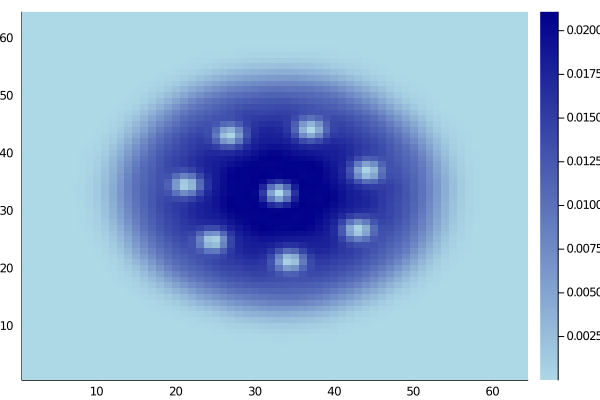

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)